In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from numpy.matlib import repmat
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import metrics
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# function to calculate accuracy of clustering
# https://github.com/k-han/DTC/blob/master/utils/util.py

from scipy.optimize import linear_sum_assignment as linear_assignment

def cluster_acc(y_true, y_pred):
    """
    Calculate clustering accuracy. Require scikit-learn installed
    # Arguments
        y: true labels, numpy.array with shape `(n_samples,)`
        y_pred: predicted labels, numpy.array with shape `(n_samples,)`
    # Return
        accuracy, in [0,1]
    """
    y_true = y_true.astype(np.int64)
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    ind = linear_assignment(w.max() - w)
    row_ind = ind[0]
    col_ind = ind[1]
    sum = 0 
    
    for i, j in zip(row_ind, col_ind): 
        sum += w[i,j] * 1.0 / y_pred.size 
        
    return sum

In [3]:
x_train = pd.read_fwf('X_train.txt', header = None)
x_test = pd.read_fwf('X_test.txt', header = None)
y_train = pd.read_fwf('y_train.txt', header = None)
y_test = pd.read_fwf('y_test.txt', header = None)
x = pd.concat([x_train, x_test])
y = pd.concat([y_train, y_test])
y = y.rename(columns={0:'label'})
data = pd.concat([x,y], axis = 1)

In [4]:
y

,label
0,5
1,5
2,5
3,5
4,5
...,...
2942,2
2943,2
2944,2
2945,2


In [5]:
data

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,label
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,2
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,2
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,2
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,2


In [6]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [7]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [8]:
y_train.iloc[:,0].unique()

array([5, 4, 6, 1, 3, 2])

In [9]:
x_train.shape

(7352, 561)

Principal Components

In [10]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

In [11]:
# normc(M) normalizes the columns of M to a length of 1.

def normc(Mat):
    return normalize(Mat, norm='l2', axis=0)

In [64]:
def principalcomponent(data,dim):
    meandata = np.mean(data,axis = 0).reshape(-1,1)
    n = data.shape[1]
    #subtract mean data
    A = (data.T - meandata)

    # compute covariance matrix
    cov_matrix = np.cov(A)


    # calculate eigenvectors and values
    eigvals,eigvecs = np.linalg.eig(cov_matrix)
    eigvecs = np.real_if_close(eigvecs,tol=1)
    
  
    
    # compute explained variance
    explained_variance = []
    for i in eigvals:
        explained_variance.append(float(i/np.sum(eigvals)))
    sum_ = int(np.sum(explained_variance))
    #np.sum(explained_variance[:2])
    print(f'explained variance for first {dim} components:', np.sum(explained_variance[:2]))
    
    # normalize eigenvectors
    eigvecs = normc(eigvecs)
    
    # sort
    V,D = eigsort(eigvecs,eigvals)
    
    # calculate principal components
    C = np.dot(V[:,:dim].T,A)
    
    #reconstruct data
    Z = np.dot(V[:,:dim],C)
    X = Z + meandata
    return X,C
        

In [65]:
#compute principal components
X,C = principalcomponent(x.to_numpy(),2)
print(C.shape)
C_df = C

explained variance for first 2 components: 0.66979699087541
(2, 10299)


In [66]:
df2 = pd.DataFrame(C_df.T,columns=['first component','second component'])
df2['label']=y

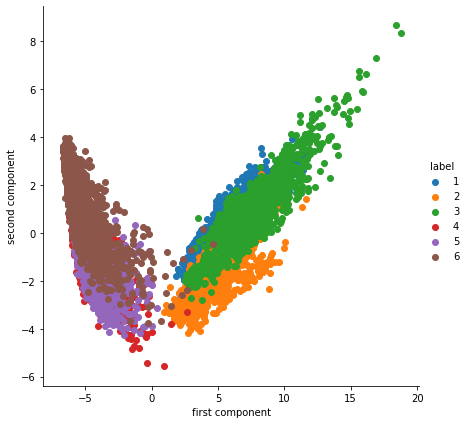

In [67]:
# plotting principal component
import seaborn as sn
cluster = [1,2,3,4,5,6]
sn.FacetGrid(df2,hue="label",height=6).map(plt.scatter,'first component','second component').add_legend()
plt.show()

'\ncode to compute explained variance\nnot used now, but could be useful later\n\nexplained_variance = []\nfor i in vals:\n    explained_variance.append(float(i/np.sum(vals)))\nsum_ = int(np.sum(explained_variance))\nnp.sum(explained_variance[:20])\n'

K-means

In [17]:
def plotCurrent(X, Rnk, Kmus):
    N, D = np.shape(X)
    K = np.shape(Kmus)[0]

    InitColorMat = np.matrix([[1, 0, 0], 
                              [0, 1, 0],   
                              [0, 0, 1],
                              [0, 0, 0],
                              [1, 1, 0], 
                              [1, 0, 1], 
                              [0, 1, 1]])

    KColorMat = InitColorMat[0:K]
    colorVec = Rnk.dot(KColorMat)
    muColorVec = np.eye(K).dot(KColorMat)
    
    plt.figure(figsize=(12, 8))

    plt.scatter(X[:,0], X[:,1], edgecolors=colorVec, marker='o', facecolors='none', alpha=0.3)
    plt.scatter(Kmus[:,0], Kmus[:,1], c=muColorVec, marker='D', s=50);
   

In [18]:
def distance(X,Y):
    #x,y : [a b]
    x1,x2 = X[0],X[1]
    y1,y2 = Y[0],Y[1]
    distance = (x1-y1)**2+(x2-y2)**2
    return distance

In [19]:
def calcSqDistances(X, Kmus):

    # Assign each data vector to closest mu vector as per Bishop (9.2)
    # Do this by first calculating a squared distance matrix where the n,k entry
    # contains the squared distance from the nth data vector to the kth mu vector
    # sqDmat will be an N-by-K matrix with the n,k entry as specfied above

    
    n = len(X) 
    k = len(Kmus)
    sqDmat = np.zeros((n,k))
    for indx,x in enumerate(X):
        for indk,k in enumerate(Kmus):
            sqDmat[indx][indk] = distance(x,k)
    return sqDmat

In [20]:
def determineRnk(sqDmat):
    # Fill this
    # given the matrix of squared distances, determine the closest cluster
    # center for each data vector 

    # R is the "responsibility" matrix
    # R will be an N-by-K matrix of binary values whose n,k entry is set as 
    # per Bishop (9.2)
    # Specifically, the n,k entry is 1 if point n is closest to cluster k,
    # and is 0 otherwise
    n = len(sqDmat)
    k = len(sqDmat[0])
    R = np.zeros((n,k))
    for i in range(n):
        index = np.argmin(sqDmat[i])
        R[i][index] = 1
    return R
    

In [21]:
np.zeros((4,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [22]:
def recalcMus(X, Rnk):
    # Fill this
    # Recalculate mu values based on cluster assignments as per Bishop (9.4)
    N = len(X)

    
    K = len(Rnk[0])
    Kmus = np.zeros((K,len(X[0])))
    for k in range(K):
        sum1 = 0
        for n in range(N):
            sum1+=Rnk[n][k]*X[n]
        sum2 = 0
        for  n in range(N):
            sum2+=Rnk[n][k]

        Kmus[k] = sum1/sum2
       

    return Kmus
    

In [23]:
def runKMeans(K, data):
    # Load data file specified by fileStringfrom Bishop book
    X = data

    # Determine and store data set information
    N = np.shape(X)[0]
    D = np.shape(X)[1]

    # Allocate space for the K mu vectors
    Kmus = np.zeros((K, D))

    # Initialize cluster centers by randomly picking points from the data
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];

    # Specify the maximum number of iterations to allow
    maxiters = 10000;

    for iter in range(maxiters):
        # Assign each data vector to closest mu vector as per Bishop (9.2)
        # Do this by first calculating a squared distance matrix where the n,k entry
        # contains the squared distance from the nth data vector to the kth mu vector

        # sqDmat will be an N-by-K matrix with the n,k entry as specfied above
        sqDmat = calcSqDistances(X, Kmus);

        # given the matrix of squared distances, determine the closest cluster
        # center for each data vector 

        # R is the "responsibility" matrix
        # R will be an N-by-K matrix of binary values whose n,k entry is set as 
        # per Bishop (9.2)
        # Specifically, the n,k entry is 1 if point n is closest to cluster k,
        # and is 0 otherwise
        Rnk = determineRnk(sqDmat)

        KmusOld = Kmus
        #plotCurrent(X, Rnk, Kmus)
        #plt.show()

        # Recalculate mu values based on cluster assignments as per Bishop (9.4)
        Kmus = recalcMus(X, Rnk)

        # Check to see if the cluster centers have converged.  If so, break.
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            break

    plotCurrent(X,Rnk,Kmus)
    plt.show()
    return Kmus

[[ 4.93665487e-03  4.24551585e-04 -1.02247916e-03 ... -1.26785092e-03
   7.18410283e-04  5.53862712e-04]
 [ 4.24551585e-04  1.66549892e-03 -1.82059313e-04 ... -1.10889228e-04
   1.27823495e-05 -1.58369457e-04]
 [-1.02247916e-03 -1.82059313e-04  3.20754453e-03 ...  2.48913758e-04
  -2.57574825e-04 -3.57948827e-04]
 ...
 [-1.26785092e-03 -1.10889228e-04  2.48913758e-04 ...  2.61946221e-01
  -1.19342625e-01 -9.19503791e-02]
 [ 7.18410283e-04  1.27823495e-05 -2.57574825e-04 ... -1.19342625e-01
   8.84943711e-02  4.93952357e-02]
 [ 5.53862712e-04 -1.58369457e-04 -3.57948827e-04 ... -9.19503791e-02
   4.93952357e-02  7.79092165e-02]]
explained variance for first 2 components: -6.7519119941028555e-18


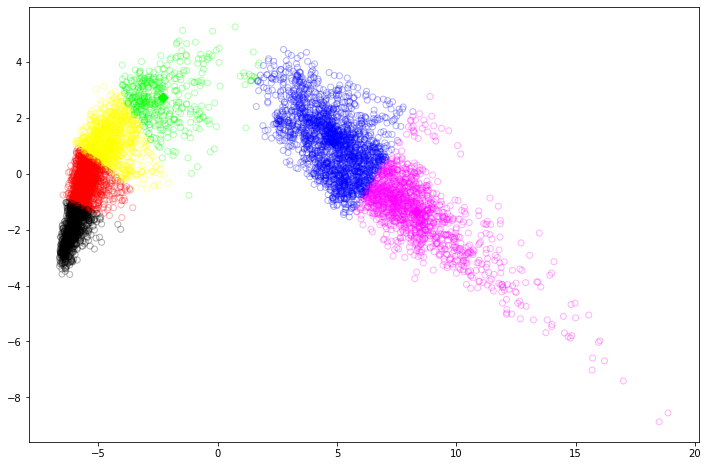

In [24]:
# run PCA first x_train
X,C = principalcomponent(x_train.to_numpy(),2)
c = runKMeans(6,C.T)

[[ 4.28050048e-03  3.37469839e-04 -7.31292978e-04 ... -1.02974046e-03
   4.93216261e-04  3.44876690e-04]
 [ 3.37469839e-04  1.37850074e-03 -5.88379993e-05 ... -1.42592154e-04
  -6.36932474e-05 -1.62062512e-04]
 [-7.31292978e-04 -5.88379993e-05  2.81250821e-03 ...  8.71632486e-05
  -2.10373183e-04 -4.05078924e-04]
 ...
 [-1.02974046e-03 -1.42592154e-04  8.71632486e-05 ...  2.61282246e-01
  -1.16833395e-01 -8.73120495e-02]
 [ 4.93216261e-04 -6.36932474e-05 -2.10373183e-04 ... -1.16833395e-01
   9.33106771e-02  4.48166305e-02]
 [ 3.44876690e-04 -1.62062512e-04 -4.05078924e-04 ... -8.73120495e-02
   4.48166305e-02  7.23062227e-02]]
explained variance for first 2 components: -5.9442974338433316e-18


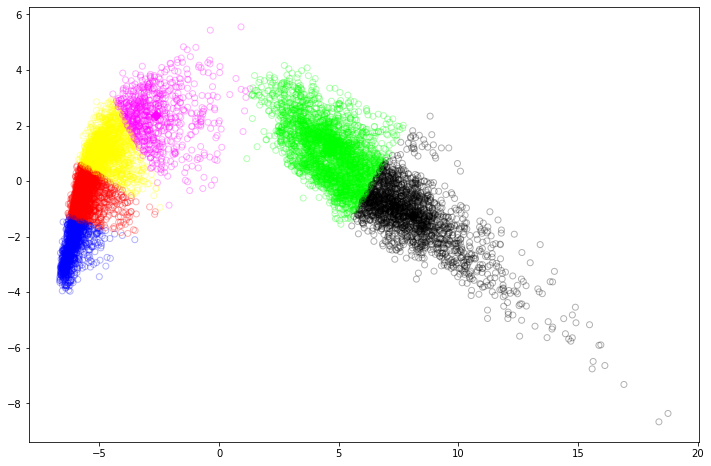

In [41]:
# run PCA first x
X,C = principalcomponent(x.to_numpy(),2)
c = runKMeans(6,C.T)

## scikit-learn pre-coded KMeans

In [26]:
y = np.array(y)
y = y.flatten()
y.shape

(10299,)

In [27]:
data_reduced = PCA(n_components=2).fit_transform(x)
data_reduced.shape

(10299, 2)

In [28]:
kmeans = KMeans(n_clusters=6)

In [29]:
y_pred = kmeans.fit_predict(data_reduced)
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [30]:
print(metrics.adjusted_mutual_info_score(y, y_pred))
print(metrics.homogeneity_score(y, y_pred))
print(metrics.completeness_score(y, y_pred))
print(metrics.v_measure_score(y, y_pred))
print(metrics.fowlkes_mallows_score(y, y_pred))
print(cluster_acc(y, y_pred))
print(classification_report(y, y_pred))

0.45831254920454967
0.4505892270562775
0.4670827098004757
0.45868774826270126
0.42305753939407115
0.4996601611806972
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00      1722
           2       0.55      0.69      0.62      1544
           3       0.00      0.00      0.00      1406
           4       0.35      0.50      0.41      1777
           5       0.00      0.00      0.00      1906
           6       0.00      0.00      0.00      1944

    accuracy                           0.19     10299
   macro avg       0.13      0.17      0.15     10299
weighted avg       0.14      0.19      0.16     10299



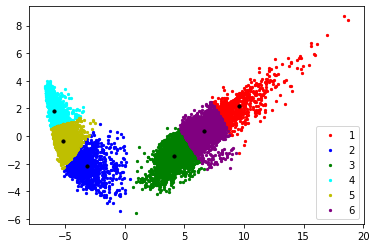

In [31]:
centroids = kmeans.cluster_centers_
index1 = []
index2 = []
index3 = []
index4 = []
index5 = []
index6 = []

for i in range(len(y_pred)): 
    if (y_pred[i] == 0):
        index1.append(i)
    elif (y_pred[i] == 1):
        index2.append(i)
    elif (y_pred[i] == 2):
        index3.append(i)
    elif (y_pred[i] == 3):
        index4.append(i)
    elif (y_pred[i] == 4):
        index5.append(i)
    elif (y_pred[i] == 5):
        index6.append(i)

plt.scatter(data_reduced[index1][:,0], data_reduced[index1][:,1], label = 1, s = 5, color = 'r')
plt.scatter(data_reduced[index2][:,0], data_reduced[index2][:,1], label = 2, s = 5, color = 'b')
plt.scatter(data_reduced[index3][:,0], data_reduced[index3][:,1], label = 3, s = 5, color = 'g')
plt.scatter(data_reduced[index4][:,0], data_reduced[index4][:,1], label = 4, s = 5, color = 'cyan')
plt.scatter(data_reduced[index5][:,0], data_reduced[index5][:,1], label = 5, s = 5, color = 'y')
plt.scatter(data_reduced[index6][:,0], data_reduced[index6][:,1], label = 6, s = 5, color = 'purple')
plt.scatter(centroids[:,0], centroids[:,1], s = 10, color = 'k')
plt.legend()
plt.show()

## Supervised Models

### Random Forest

In [32]:
y_train = np.array(y_train).ravel()
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [33]:
# Use accuracy_score to get the accuracy of this model
accuracy_score(y_test, y_pred)

0.9263657957244655

In [34]:
# Use classification report to evaluate the outcome
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.91      0.96      0.93       496
           2       0.88      0.92      0.90       471
           3       0.97      0.85      0.91       420
           4       0.91      0.89      0.90       491
           5       0.90      0.92      0.91       532
           6       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.93      0.93      2947



### Logistic Regression

In [35]:
logReg = LogisticRegression()
logReg.fit(x_train,y_train)
logReg_pred = logReg.predict(x_test)

In [36]:
# Use accuracy_score to get the accuracy of this model
accuracy_score(y_test, logReg_pred)

0.9572446555819477

In [37]:
# Use classification report to evaluate the outcome
print(classification_report(y_test, logReg_pred))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       496
           2       0.96      0.94      0.95       471
           3       0.98      0.96      0.97       420
           4       0.96      0.88      0.92       491
           5       0.90      0.97      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



### K-Nearest Neighbor (KNN)

In [38]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

In [39]:
# Use accuracy_score to get the accuracy of this model
accuracy_score(y_test, knn_pred)

0.9009161859518154

In [40]:
# Use classification report to evaluate the outcome
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           1       0.83      0.98      0.90       496
           2       0.89      0.90      0.90       471
           3       0.96      0.76      0.85       420
           4       0.87      0.86      0.87       491
           5       0.88      0.89      0.88       532
           6       1.00      0.99      1.00       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947

